<a href="https://colab.research.google.com/github/joaochenriques/Turbomachines_pyBEMT/blob/main/Rotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib

if not pathlib.Path("mpl_utils.py").exists():
  os.system( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']

In [2]:
!pip install git+https://github.com/kegiljarhus/pybemt.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kegiljarhus/pybemt.git to /tmp/pip-req-build-70ltyymg
  Running command git clone -q https://github.com/kegiljarhus/pybemt.git /tmp/pip-req-build-70ltyymg
  Created wheel for pybemt: filename=pybemt-0.1.0-py3-none-any.whl size=27915 sha256=09d0a288bc09719f42ad4cc5f263d8a8e4b551353a6335cd5817d3bfd39c6187
  Stored in directory: /tmp/pip-ephem-wheel-cache-d04l8q3t/wheels/1b/1f/d5/fe14d42d6aa7d8da937e514e51afa61c3093e395de3eba06e2
Successfully built pybemt


In [3]:
!curl -O https://raw.githubusercontent.com/joaochenriques/Turbomachines_pyBEMT/main/test_config.ini

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   402  100   402    0     0   3350      0 --:--:-- --:--:-- --:--:--  3350


In [4]:
from pybemt.solver import Solver
import matplotlib.pyplot as pl

In [5]:
solver = Solver('test_config.ini')
T, Q, P, df = solver.run()
T, Q, P

--- Results ---
Trust (N):	 18.165594716317923
Torque (Nm):	 0.6331256667274107
Power (W):	 132.60152955933154


(18.165594716317923, 0.6331256667274107, 132.60152955933154)

In [6]:
df

,radius,chord,pitch,Cl,Cd,dT,dQ,F,a,ap,Re,AoA
0,0.07112,0.056,0.342085,0.808143,0.021040,0.399394,0.008624,0.927706,2.862794,0.058352,55139.041357,4.202486
1,0.10668,0.070,0.312414,0.897390,0.020697,1.258291,0.036530,0.968018,4.244372,0.051696,103408.615283,3.997758
2,0.14224,0.070,0.251327,0.814936,0.019957,2.081059,0.066543,0.988724,4.723226,0.035642,138779.603685,3.133321
3,0.17780,0.065,0.202458,0.742332,0.020464,2.794167,0.094739,0.996192,4.891512,0.025049,161803.583572,2.382630
4,0.21336,0.058,0.169297,0.701230,0.020922,3.426225,0.121371,0.997999,4.944671,0.018372,173762.533053,1.982192
5,0.24892,0.050,0.146608,0.685138,0.021118,3.956433,0.144286,0.996547,4.920939,0.013829,175129.470090,1.830482
6,0.28448,0.043,0.125664,0.599940,0.022094,3.913085,0.146419,0.991552,4.558874,0.010064,172410.498017,1.815926
7,0.30000,0.010,0.000000,0.197457,0.022090,0.336941,0.014614,0.999980,1.017167,0.002340,42446.755244,-1.843115


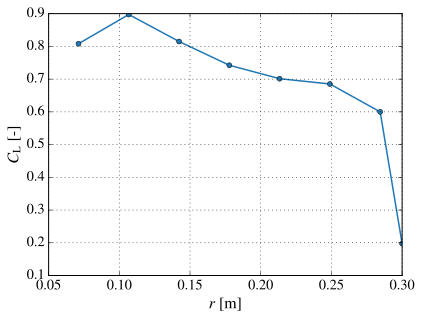

In [7]:
pl.plot( df['radius'], df['Cl'], 'o-' )
pl.grid()
pl.xlabel( r'$r$ [m]' )
pl.ylabel( r'$C_\mathrm{L}$ [-]' )
pl.savefig( 'FIG_alpha_CL.pdf', bbox_inches='tight', pad_inches=0.05 )

In [8]:
solver.solver = 'brute'
Tb, Qb, Pb, df = solver.run()
Tb, Qb, Pb

/usr/local/lib/python3.7/dist-packages/pybemt/rotor.py:270: RuntimeWarning: divide by zero encountered in double_scalars
  resid = sin(phi)/(1 + C*a) - v_inf*cos(phi)/(omega*self.radius*(1 - C*ap))
/usr/local/lib/python3.7/dist-packages/pybemt/rotor.py:270: RuntimeWarning: invalid value encountered in double_scalars
  resid = sin(phi)/(1 + C*a) - v_inf*cos(phi)/(omega*self.radius*(1 - C*ap))


--- Results ---
Trust (N):	 18.219122064891447
Torque (Nm):	 0.6334295027106964
Power (W):	 132.66516481886399


(18.219122064891447, 0.6334295027106964, 132.66516481886399)

In [9]:
J, CT, CQ, CP, eta = solver.rotor_coeffs( T, Q, P)
J, CT, CQ, CP, eta

(0.03749999999999999,
 0.03258337700232406,
 0.0014195359834748417,
 0.00891920763438185,
 0.13699385502329264)